# THE SPARK FOUNDATION

# NAME : POOJA YADAV

# TASK 1 - Prediction using supervise ML

# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [38]:
#import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [39]:
#reading data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [21]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [40]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [42]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

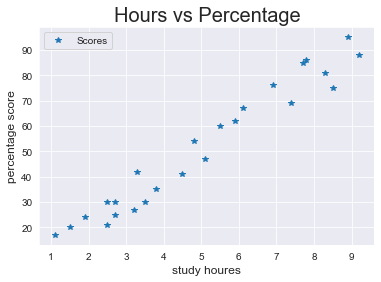

In [43]:
#plotting the graph of the data 
data.plot(x='Hours', y='Scores', style ='*')
plt.title('Hours vs Percentage', size=20)
plt.xlabel('study houres', size=12)
plt.ylabel('percentage score', size= 12)
plt.show

<AxesSubplot:ylabel='Scores'>

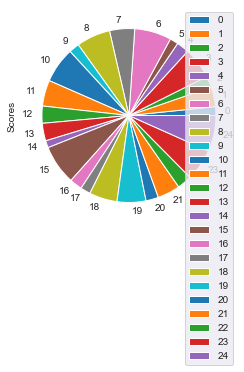

In [44]:
data.plot.pie(x='Houres', y='Scores')

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


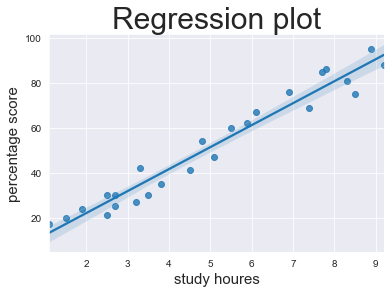

In [45]:
sns.set_style('darkgrid')
sns.regplot(x=data['Hours'], y=data['Scores'])
plt.title('Regression plot',size=30)
plt.xlabel('study houres', size=15)
plt.ylabel('percentage score', size= 15)
plt.show
print(data.corr())

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [46]:
#split the data
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [47]:
#split the data into train and test dataset
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [48]:
X_train.shape, X_test.shape

((20, 1), (5, 1))

In [49]:
y_train.shape,y_test.shape

((20,), (5,))

In [50]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print('******model trained******')

******model trained******


In [51]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [52]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [53]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [54]:
#test the model
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating the model

In [55]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
